In [126]:
import seaborn as sns
import pandas as pd
import numpy as np
import csv
%load_ext autoreload
%autoreload 2
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_json('data/data.json')
df.head()
df.describe()
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [3]:
df['user_type'].unique()
df['acct_type'].unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

# Step 1: EDA

In [4]:
#1
df['fraud'] = df['acct_type'].apply(lambda x: 'fraud' in x)
df['fraud']

0         True
1        False
2        False
3        False
4        False
         ...  
14332     True
14333    False
14334    False
14335    False
14336     True
Name: fraud, Length: 14337, dtype: bool

In [5]:
df.drop(columns=['acct_type'], inplace=True)

In [6]:
#2
df[df['fraud']==True]['fraud'].count()
df[df['fraud']==False]['fraud'].count()
# Fraud = ~10%

13044

In [7]:
#3
features = ['body_length'    ,
'channels'       ,
'delivery_method',
'has_logo'       ,
'name_length'    ,
'org_facebook'   ,
'org_twitter'    ,
'sale_duration'  ,
'sale_duration2' ,
'user_age'       ,
'fraud']


In [8]:
df = df[features]

### Scoping the problem

1.) Preprocessing
- Convert dates to dt format
- Convert binary categories to boolean

2.) Models to Try

3.) Metric to use

# Step 2: Building the Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df.dropna(inplace=True)


X = df.drop(columns=['fraud'])
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [10]:
X_train.count()
X_test.count()

body_length        3533
channels           3533
delivery_method    3533
has_logo           3533
name_length        3533
org_facebook       3533
org_twitter        3533
sale_duration      3533
sale_duration2     3533
user_age           3533
dtype: int64

In [127]:
from sklearn.metrics import confusion_matrix

def logistic_model(X, y):
    from sklearn.linear_model import LogisticRegression
    
    #select the columns with numerical/categorical data
    #X = X.loc[:, (X.dtypes == np.float64) or (X.dtypes == np.int64)]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y)
    
    
   
    
    #fit model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    accuracy = model.score(X_valid, y_valid)
    coeffs = pd.DataFrame(model.coef_, columns=X_train.columns)
    print(coeffs)
    tn, fp, fn, tp = confusion_matrix(model.predict(X_valid), y_valid).ravel()
    plot_confusion_matrix(model, X_valid, y_valid, values_format='d')
    plt.savefig('plots/logistic', dpi=240)
    
    return model, accuracy, (tn, fp, fn, tp)


def SGD_model(X, y):
    from sklearn.linear_model import SGDClassifier
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y)
    
    #fit model
    model = SGDClassifier()
    model.fit(X_train, y_train)
    accuracy = model.score(X_valid, y_valid)
    tn, fp, fn, tp = confusion_matrix(model.predict(X_valid), y_valid).ravel()
    plot_confusion_matrix(model, X_valid, y_valid, values_format='d')
    plt.savefig('plots/SGD', dpi=240)
  
    
    return model, accuracy, (tn, fp, fn, tp)
    
def rf_model(X,y):
    from sklearn.ensemble import RandomForestClassifier
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y)
    
    #fit model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    accuracy = model.score(X_valid, y_valid)
    tn, fp, fn, tp = confusion_matrix(model.predict(X_valid), y_valid).ravel()
    plot_confusion_matrix(model, X_valid, y_valid, values_format='d')
    plt.savefig('plots/rf', dpi=240)
    
    
    return model, accuracy, (tn, fp, fn, tp)

def gradient_model(X,y):
    from sklearn.ensemble import GradientBoostingClassifier
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y)
    
    #fit model
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    accuracy = model.score(X_valid, y_valid)
    tn, fp, fn, tp = confusion_matrix(model.predict(X_valid), y_valid).ravel()
    plot_confusion_matrix(model, X_valid, y_valid, values_format='d')
    plt.savefig('plots/gradient', dpi=240)
    
    
    return model, accuracy, (tn, fp, fn, tp)

/Users/jacobmullins/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   body_length  channels  delivery_method  has_logo  name_length  \
0    -0.000053 -0.077079        -0.063069 -0.010603     0.000215   

   org_facebook  org_twitter  sale_duration  sale_duration2  user_age  
0     -0.064564    -0.183789       0.060731       -0.085937 -0.003261  


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 0.9241509433962264,
 (2434, 197, 4, 15))

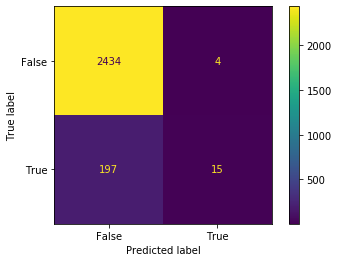

In [128]:
logistic_model(X_train, y_train)

(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 0.8924528301886793,
 (2250, 97, 188, 115))

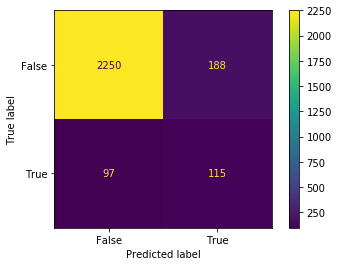

In [129]:
SGD_model(X_train, y_train)

(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 0.9633962264150944,
 (2416, 75, 22, 137))

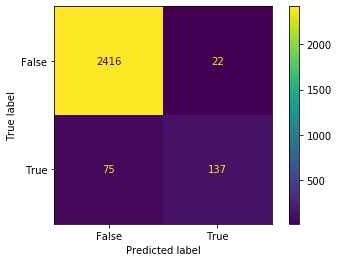

In [130]:
gradient_model(X_train, y_train)

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 0.9558490566037736,
 (2401, 80, 37, 132))

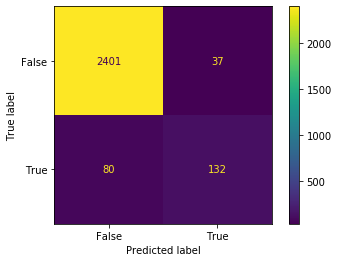

In [131]:
rf_model(X_train, y_train)

In [69]:
df3 = pd.concat([X_test, y_test], axis=1)

random_subset = df3.sample(n=100)
random_subset.to_csv('test_script_examples.csv', index=False)
random_subset

,body_length,channels,delivery_method,has_logo,name_length,org_facebook,org_twitter,sale_duration,sale_duration2,user_age,fraud
3718,3125,8,0.0,1,67,9.0,13.0,44.0,45,0,False
7461,6325,8,1.0,1,72,0.0,0.0,61.0,61,1240,False
8003,3501,0,1.0,1,28,15.0,16.0,134.0,360,0,False
6332,1848,0,0.0,1,36,20.0,10.0,75.0,76,455,False
6764,3298,0,1.0,1,57,0.0,0.0,19.0,19,1173,False
...,...,...,...,...,...,...,...,...,...,...,...
6726,334,0,0.0,0,38,0.0,0.0,4.0,4,0,True
1380,313,11,0.0,1,48,0.0,0.0,142.0,142,36,False
4041,2402,11,0.0,1,27,0.0,0.0,35.0,35,0,False
13490,795,0,0.0,1,13,0.0,0.0,40.0,40,0,True


In [18]:
#with open('test_script_examples.csv') as fd:
#    reader=csv.reader(fd)
#    #test_row=next(reader)
#    next(reader)

In [19]:
with open('test_script_examples.csv') as fd:
    reader=csv.reader(fd)
    interestingrow=[row for idx, row in enumerate(reader) if idx in [np.random.randint(1,100)]][0]

In [20]:
interestingrow

['2523', '0', '0.0', '1', '34', '20.0', '0.0', '13.0', '14', '1308', 'False']

In [21]:
l=[]
for x in interestingrow:
    try:l.append(float(x))
    except:l.append(bool(x))

interestingrow

np.array(l[:-1])

## for predict.py

array([2.523e+03, 0.000e+00, 0.000e+00, 1.000e+00, 3.400e+01, 2.000e+01,
       0.000e+00, 1.300e+01, 1.400e+01, 1.308e+03])

In [22]:
import pickle

with open('test_script_examples.csv') as fd:
    reader=csv.reader(fd)
    interestingrow=[row for idx, row in enumerate(reader) if idx in (0,np.random.randint(1,100))][1]

interestingrow

l=[]
for x in interestingrow:
    try:l.append(float(x))
    except:l.append(x)

In [23]:
l

[6422.0, 5.0, 1.0, 1.0, 41.0, 15.0, 15.0, 104.0, 121.0, 169.0, 'False']

In [24]:
input=pd.Series(l[:-1])
truth=pd.Series(l[-1])

np.array(input)

array([6.422e+03, 5.000e+00, 1.000e+00, 1.000e+00, 4.100e+01, 1.500e+01,
       1.500e+01, 1.040e+02, 1.210e+02, 1.690e+02])

In [35]:
model, accuracy, (tn, fp, fn, tp) = rf_model(X_train, y_train)

#pickle model
from joblib import dump, load
dump(model, 'modelpickle.joblib')

#unpickle
model = load('modelpickle.joblib')

model.predict(np.array(input).reshape(1,-1))

np.array(truth)

array(['False'], dtype=object)

In [36]:
sgd_model, accuracy, (tn, fp, fn, tp) = SGD_model(X_train, y_train)
dump(sgd_model, 'sgdmodelpickle.joblib')

['sgdmodelpickle.joblib']

In [83]:
from joblib import dump, load


with open('test_script_examples.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader)]
    if idx == np.random.randint(1,101):

ValueError: too many values to unpack (expected 2)

In [90]:
with open('test_script_examples.csv') as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader)]
    interestingrow = interestingrows[np.random.randint(1,100)]

In [93]:
!python flask/predict.py

In [41]:
model.classes_

array([False,  True])

In [ ]:
!python flask/app.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
 * Restarting with fsevents reloader
 * Debugger is active!
 * Debugger PIN: 940-060-902
127.0.0.1 - - [29/May/2020 15:40:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2020 15:40:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2020 15:40:22] "GET /score HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2020 15:40:22] "GET /score HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2020 15:40:30] "GET /score HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2020 15:40:34] "GET /score HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2020 15:56:55] "GET /score HTTP/1.1" 200 -
